In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
header_list = ["userId", "productId", "Rating", "timestamp"]
df = pd.read_csv("E:\\backup\\OneDrive\\Desktop\\Data Science\\Project\\Recommendation\\ratings.csv", names=header_list)

In [3]:
df

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [4]:
df=df.drop('timestamp',axis=1)

In [5]:
df.drop_duplicates()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824478,A322MDK0M89RHN,BT008UKTMW,5.0
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [7]:
data=df.productId.unique()
data=pd.DataFrame(data)
data

,0
0,0132793040
1,0321732944
2,0439886341
3,0511189877
4,0528881469
...,...
475997,BT008G3W52
475998,BT008SXQ4C
475999,BT008T2BGK
476000,BT008UKTMW


In [8]:
df.productId.unique().shape

(476002,)

In [9]:
df.shape

(7824482, 3)

In [10]:
df.isnull().any()

userId       False
productId    False
Rating       False
dtype: bool

In [11]:
df1=df.iloc[:1000000,]

In [12]:
df1

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
999995,A2OC5SYI7THCR6,B000HDU0Q4,5.0
999996,ALWL0AJ94O8RJ,B000HDU0Q4,5.0
999997,A1XTY9T4FYKT7S,B000HDU0Q4,4.0
999998,AC4IGGPO6HY0M,B000HDU0Q4,2.0


In [13]:
df1.describe()['Rating'].T

count    1000000.000000
mean           3.973620
std            1.399741
min            1.000000
25%            3.000000
50%            5.000000
75%            5.000000
max            5.000000
Name: Rating, dtype: float64

E:\softwares\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


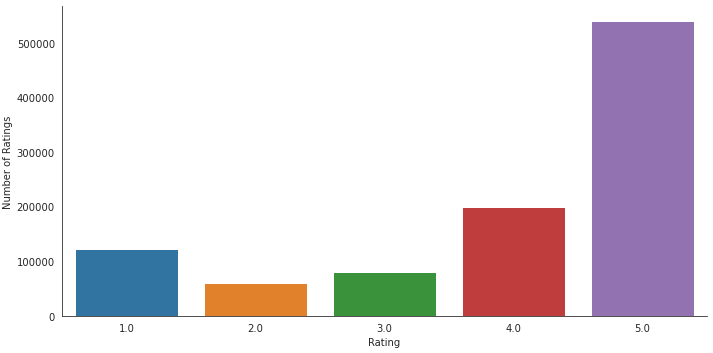

In [14]:
with sns.axes_style('white'):
    rate = sns.factorplot("Rating", data=df1, aspect=2.0,kind='count')
    rate.set_ylabels("Number of Ratings")

In [15]:
print("Total Data")

print("Total No of Ratings :",df1.shape[0])
print("Total No of Users :",len(np.unique(df1.userId)))
print("Total No of Products :",len(np.unique(df1.productId)))

Total Data
Total No of Ratings : 1000000
Total No of Users : 754153
Total No of Products : 59634


In [16]:
No_of_Rated_Products_per_User = df1.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
No_of_Rated_Products_per_User

userId
A5JLAU2ARJ0BO     409
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      138
AT6CZDCP4TRGA     125
                 ... 
A2DKIW4WMCXCC7      1
A2DKJTBLJ47Y0M      1
A2DKJW3JKVYEDB      1
A2DKJWEQ7D6FM7      1
AZZZOVIBXHGDR       1
Name: Rating, Length: 754153, dtype: int64

In [17]:
No_of_Rated_Products_per_User.describe()

count    754153.000000
mean          1.325991
std           1.372250
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         409.000000
Name: Rating, dtype: float64

In [18]:
print(' No of Rated Product More than 50 per User : {}'.format(sum(No_of_Rated_Products_per_User >= 50)))

 No of Rated Product More than 50 per User : 37


In [19]:
df2=df1.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

In [20]:
df2.groupby('productId')['Rating'].mean()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
                ...   
B000HDMUU8    4.543860
B000HDONV2    4.507042
B000HDONWQ    3.981818
B000HDQ2G6    4.408805
B000HDU0Q4    4.408451
Name: Rating, Length: 3639, dtype: float64

In [21]:
df2.groupby('productId')['Rating'].mean().sort_values(ascending=False)

productId
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B0002E52S4    4.861111
                ...   
B00093040Y    1.568627
B0002325XK    1.531250
B00020QJC6    1.500000
B000C4ATGY    1.360000
B00024L6P2    1.203704
Name: Rating, Length: 3639, dtype: float64

In [22]:
df2.groupby('productId')['Rating'].count().sort_values(ascending=False)

productId
B0002L5R78    9487
B0001FTVEK    5345
B000BQ7GW8    4275
B00007E7JU    3523
B000BKJZ9Q    3219
              ... 
B00008JOMD      50
B00020E4QO      50
B0000CG4DI      50
B0006ZO2CG      50
B000FOI2TW      50
Name: Rating, Length: 3639, dtype: int64

In [23]:
Ratings_values = pd.DataFrame(df2.groupby('productId')['Rating'].mean())

In [24]:
Ratings_values['Count'] = pd.DataFrame(df2.groupby('productId')['Rating'].count())

In [25]:
Ratings_values

,Rating,Count
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
...,...,...
B000HDMUU8,4.543860,57
B000HDONV2,4.507042,71
B000HDONWQ,3.981818,55


Text(0, 0.5, 'Values')

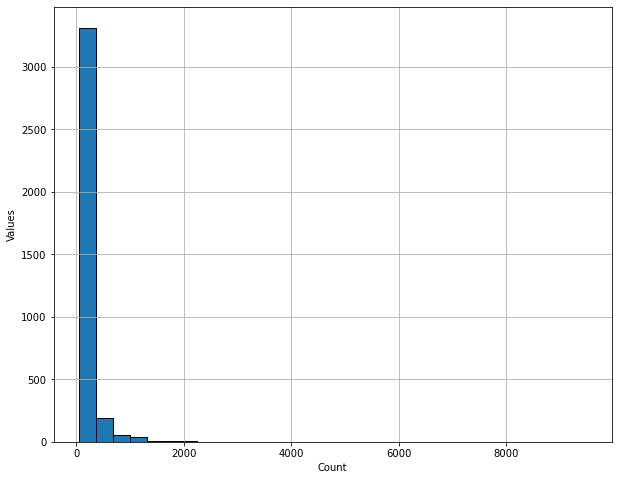

In [26]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
hist_count=Ratings_values['Count'].hist(bins=30)
hist_count.set_xlabel('Count')
hist_count.set_ylabel('Values')

Text(0, 0.5, 'Values')

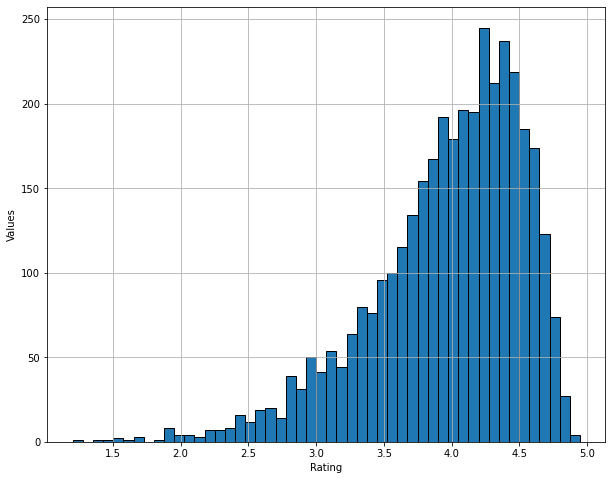

In [27]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
hist_rating=Ratings_values['Rating'].hist(bins=50)
hist_rating.set_xlabel('Rating')
hist_rating.set_ylabel('Values')

<Figure size 720x576 with 0 Axes>

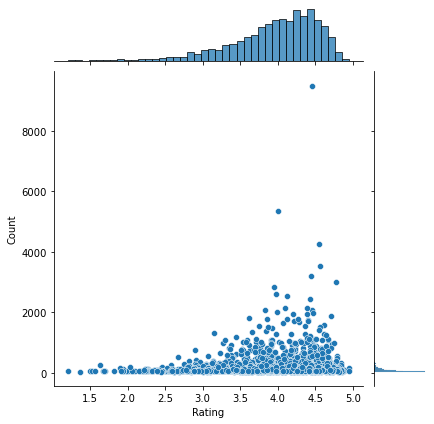

In [28]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating',y='Count', data=Ratings_values)

In [29]:
df['link']=''

In [30]:
df

,userId,productId,Rating,link
0,AKM1MP6P0OYPR,0132793040,5.0,
1,A2CX7LUOHB2NDG,0321732944,5.0,
2,A2NWSAGRHCP8N5,0439886341,1.0,
3,A2WNBOD3WNDNKT,0439886341,3.0,
4,A1GI0U4ZRJA8WN,0439886341,1.0,
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,


In [31]:
df['link']='www.amazon.com/dp/'+df['productId']

In [32]:
df

,userId,productId,Rating,link
0,AKM1MP6P0OYPR,0132793040,5.0,www.amazon.com/dp/0132793040
1,A2CX7LUOHB2NDG,0321732944,5.0,www.amazon.com/dp/0321732944
2,A2NWSAGRHCP8N5,0439886341,1.0,www.amazon.com/dp/0439886341
3,A2WNBOD3WNDNKT,0439886341,3.0,www.amazon.com/dp/0439886341
4,A1GI0U4ZRJA8WN,0439886341,1.0,www.amazon.com/dp/0439886341
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,www.amazon.com/dp/BT008UKTMW
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,www.amazon.com/dp/BT008UKTMW
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,www.amazon.com/dp/BT008UKTMW
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,www.amazon.com/dp/BT008UKTMW


In [33]:
data_new=df.iloc[:16000]

In [34]:
data_new.head(30)

,userId,productId,Rating,link
0,AKM1MP6P0OYPR,0132793040,5.0,www.amazon.com/dp/0132793040
1,A2CX7LUOHB2NDG,0321732944,5.0,www.amazon.com/dp/0321732944
2,A2NWSAGRHCP8N5,0439886341,1.0,www.amazon.com/dp/0439886341
3,A2WNBOD3WNDNKT,0439886341,3.0,www.amazon.com/dp/0439886341
4,A1GI0U4ZRJA8WN,0439886341,1.0,www.amazon.com/dp/0439886341
5,A1QGNMC6O1VW39,0511189877,5.0,www.amazon.com/dp/0511189877
6,A3J3BRHTDRFJ2G,0511189877,2.0,www.amazon.com/dp/0511189877
7,A2TY0BTJOTENPG,0511189877,5.0,www.amazon.com/dp/0511189877
8,A34ATBPOK6HCHY,0511189877,5.0,www.amazon.com/dp/0511189877
9,A89DO69P0XZ27,0511189877,5.0,www.amazon.com/dp/0511189877


In [37]:
df3=data_new.pivot_table(index='userId',columns='productId',values='Rating').reset_index(drop=True)
df3

productId,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00000JFEX,B00000JFF2,B00000JFFR,B00000JFGB,B00000JFGE,B00000JFGF,B00000JFGI,B00000JFGK,B00000JFGN,B00000JFGT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df3.index=data_new['userId'].unique()
df3

productId,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00000JFEX,B00000JFF2,B00000JFFR,B00000JFGB,B00000JFGE,B00000JFGF,B00000JFGI,B00000JFGK,B00000JFGN,B00000JFGT
AKM1MP6P0OYPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2CX7LUOHB2NDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2NWSAGRHCP8N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2WNBOD3WNDNKT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1GI0U4ZRJA8WN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3EO1HKZ9LZQRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1RWZ23KOBEKKH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4LR8SFJ90MOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2QDSCVMNRKTA9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df3.fillna(0, inplace=True)
df3

productId,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00000JFEX,B00000JFF2,B00000JFFR,B00000JFGB,B00000JFGE,B00000JFGF,B00000JFGI,B00000JFGK,B00000JFGN,B00000JFGT
AKM1MP6P0OYPR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2CX7LUOHB2NDG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2NWSAGRHCP8N5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2WNBOD3WNDNKT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1GI0U4ZRJA8WN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3EO1HKZ9LZQRS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RWZ23KOBEKKH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A4LR8SFJ90MOV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2QDSCVMNRKTA9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [41]:
user_sim = 1 - pairwise_distances( df3.values,metric='cosine')

In [42]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
user_sim_df = pd.DataFrame(user_sim)

In [44]:
user_sim_df.index = data_new.userId.unique()
user_sim_df.columns = data_new.userId.unique()

In [45]:
user_sim_df.iloc[0:5, 0:5]

,AKM1MP6P0OYPR,A2CX7LUOHB2NDG,A2NWSAGRHCP8N5,A2WNBOD3WNDNKT,A1GI0U4ZRJA8WN
AKM1MP6P0OYPR,1.0,0.0,0.0,0.0,0.0
A2CX7LUOHB2NDG,0.0,1.0,0.0,0.0,0.0
A2NWSAGRHCP8N5,0.0,0.0,1.0,0.0,0.0
A2WNBOD3WNDNKT,0.0,0.0,0.0,1.0,0.0
A1GI0U4ZRJA8WN,0.0,0.0,0.0,0.0,1.0


In [46]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,AKM1MP6P0OYPR,A2CX7LUOHB2NDG,A2NWSAGRHCP8N5,A2WNBOD3WNDNKT,A1GI0U4ZRJA8WN
AKM1MP6P0OYPR,0.0,0.0,0.0,0.0,0.0
A2CX7LUOHB2NDG,0.0,0.0,0.0,0.0,0.0
A2NWSAGRHCP8N5,0.0,0.0,0.0,0.0,0.0
A2WNBOD3WNDNKT,0.0,0.0,0.0,0.0,0.0
A1GI0U4ZRJA8WN,0.0,0.0,0.0,0.0,0.0


In [47]:
new_1=user_sim_df.idxmax(axis=1)

In [48]:
new_1.head(30)

AKM1MP6P0OYPR     A32F14G99EFQ0Y
A2CX7LUOHB2NDG     A33MVR4OT3321
A2NWSAGRHCP8N5     AZQZ3STMCBG5H
A2WNBOD3WNDNKT    A3S51KDTK4P2JP
A1GI0U4ZRJA8WN    A1QGNMC6O1VW39
A1QGNMC6O1VW39    A1GI0U4ZRJA8WN
A3J3BRHTDRFJ2G    A1CF0FFI4FRT78
A2TY0BTJOTENPG    A2NMKXOB5IRLBQ
A34ATBPOK6HCHY    A1MDERNKA03DON
A89DO69P0XZ27      AYM7NJTTX3M0L
AZYNQZ94U6VDB      AYNGELTTLBXVN
A1DA3W4GTFXP6O     AO94DHGC771SJ
A29LPQQDG7LD5J    A2G2K3OC74CPFZ
AO94DHGC771SJ     A1DA3W4GTFXP6O
AMO214LNFCEI4     A2CK3I4925FV8W
A28B1G1MSJ6OO1    A29AHNG4TUERKG
A3N7T0DY83Y4IG     A70MDVX1NI1MM
A1H8PY3QHMQQA0    A2WXLG4AYEDOQI
A2CPBQ5W4OGBX     A2XTFY0GJDF3R2
A265MKAR2WEH3Y    A1DA3W4GTFXP6O
A37K02NKUIT68K    A27WRC8KIFFTWS
A2AW1SSVUIYV9Y    A1DA3W4GTFXP6O
A2AEHUKOV014BP    A3F069UFW04K1E
AMLFNXUIEMN4T     A2RMLNVKPFRK7X
A2O8FIJR9EBU56    A3KHBD3YRNY5WO
A3IQGFB959IR4P     AML8NIWFKHZJU
AYTBGUX49LF3W      AS2KRDSIWBM2P
A24QFSUU00IZ05    A1WSLZ5AVVHLRX
A1NG5X8VYZWX0Q    A3T6ZQONABIJSG
A1E4WG8HRWWK4R    A2063NNYWR4B7J
dtype: obj

In [49]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()

In [50]:
data3 = Dataset.load_from_df(data_new[['userId', 'productId', 'Rating']], reader)

In [51]:
data3

In [52]:
svd = SVD()
cross_validate(svd, data3, measures=['RMSE', 'MAE'],cv=5)

{'test_rmse': array([1.37262905, 1.38057195, 1.39983182, 1.3540044 , 1.34442717]),
 'test_mae': array([1.10949543, 1.11363503, 1.11952273, 1.09961538, 1.09916462]),
 'fit_time': (0.4218113422393799,
  0.20307374000549316,
  0.20307540893554688,
  0.21870160102844238,
  0.2187042236328125),
 'test_time': (1.2199509143829346,
  0.015620231628417969,
  0.015621185302734375,
  0.015619039535522461,
  0.015643835067749023)}

In [53]:
trainset = data3.build_full_trainset()
svd.fit(trainset)

In [54]:
data_new[data_new['userId'] == 'A1CF0FFI4FRT78']

,userId,productId,Rating,link
8652,A1CF0FFI4FRT78,B00000IGBF,5.0,www.amazon.com/dp/B00000IGBF


In [55]:
svd.predict('A1CF0FFI4FRT78', '0511189877', 2)

Prediction(uid='A1CF0FFI4FRT78', iid='0511189877', r_ui=2, est=4.264927648045788, details={'was_impossible': False})

In [56]:
mean_rating = data_new.groupby('productId')[['Rating']].mean()
mean_rating

,Rating
productId,
0132793040,5.000000
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852
...,...
B00000JFGF,2.555556
B00000JFGI,5.000000
B00000JFGK,3.333333


In [57]:
lowest_rated = mean_rating['Rating'].idxmin()
data_new.loc[data_new['productId'] == lowest_rated]

,userId,productId,Rating,link
50,A34O6MND17VDDH,0594017343,1.0,www.amazon.com/dp/0594017343


In [58]:
highest_rated = mean_rating['Rating'].idxmax()
data_new.loc[data_new['productId'] == highest_rated]

,userId,productId,Rating,link
0,AKM1MP6P0OYPR,0132793040,5.0,www.amazon.com/dp/0132793040


In [59]:
data_new[data_new['productId']==highest_rated]

,userId,productId,Rating,link
0,AKM1MP6P0OYPR,0132793040,5.0,www.amazon.com/dp/0132793040


In [60]:
data_new[data_new['productId']==lowest_rated]

,userId,productId,Rating,link
50,A34O6MND17VDDH,0594017343,1.0,www.amazon.com/dp/0594017343


In [61]:
product_stats = data_new.groupby('productId')[['Rating']].agg(['count', 'mean'])
product_stats.columns = product_stats.columns.droplevel()

In [67]:
from scipy.sparse import csr_matrix

def create_matrix(df5):
      
    N = len(df5['userId'].unique())
    M = len(df5['productId'].unique())

    user_mapper = dict(zip(np.unique(df5["userId"]), list(range(N))))
    product_mapper = dict(zip(np.unique(df5["productId"]), list(range(M))))
      
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df5["userId"])))
    product_inv_mapper = dict(zip(list(range(M)), np.unique(df5["productId"])))
      
    user_index = [user_mapper[i] for i in df5['userId']]
    product_index = [product_mapper[i] for i in df5['productId']]
  
    X = csr_matrix((df5["Rating"], (product_index, user_index)), shape=(M, N))
      
    return X, user_mapper, product_mapper, user_inv_mapper,product_inv_mapper

In [68]:
X, user_mapper, product_mapper, user_inv_mapper,product_inv_mapper = create_matrix(data_new)

In [69]:
from sklearn.neighbors import NearestNeighbors

In [70]:
def find_similar_products(product_id, X, k, metric='cosine', show_distance=False):
      
    neighbour_ids = []
      
    product_ind = product_mapper[product_id]
    product_vec = X[product_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    product_vec = product_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(product_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(product_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [71]:
product_ids = dict(zip(data_new['productId'], data_new['link']))

In [72]:
data_new.sample()

,userId,productId,Rating,link
387,A1HZ68B7UMNWVW,0972683275,5.0,www.amazon.com/dp/0972683275


In [73]:
data_new.sample()

,userId,productId,Rating,link
91,A3S0RV5ZQ37538,0594451647,4.0,www.amazon.com/dp/0594451647


In [74]:
data_new.sample()

,userId,productId,Rating,link
5573,A3ADBFNTPW4YS2,9966338926,1.0,www.amazon.com/dp/9966338926


In [75]:
data_new.sample()

,userId,productId,Rating,link
6898,A19NVGX4XXNM7H,9985574389,1.0,www.amazon.com/dp/9985574389


In [76]:
data_new.sample()

,userId,productId,Rating,link
8621,A3IWDD4MBK0XXZ,B00000IGBF,5.0,www.amazon.com/dp/B00000IGBF


In [82]:
try:
    inpu_id = input("Enter your userId : ")
    user_recom=data_new[data_new['userId'] == inpu_id]
    random_num = user_recom.sample()
    random_product=random_num['productId']
    product_id = random_product.iloc[0]
    similar_ids = find_similar_products(product_id, X, k=10)
    product_ids_new = product_ids[product_id]
    print("")
    print(f"Since you bought : {product_ids_new}")
    print("")
    print("These are the products you might like:")
    print("")
    for i in similar_ids:
        print(product_ids[i])
except:
    raise Exception('Wrong userId. Please check the userId and dont leave any space before and after entering userId.')

Enter your userId : A3IWDD4MBK0XXZ

Since you bought : www.amazon.com/dp/B00000IGBF

These are the products you might like:

www.amazon.com/dp/B00000J0IU
www.amazon.com/dp/B00000J3PR
www.amazon.com/dp/B00000DM9R
www.amazon.com/dp/B00000J06D
www.amazon.com/dp/B00000J3Q1
www.amazon.com/dp/B00000J3NG
www.amazon.com/dp/B00000J434
www.amazon.com/dp/B00000J4FS
www.amazon.com/dp/B00000JBAT
www.amazon.com/dp/9990950164


In [81]:
try:
    inpu_id_1 = input("Enter Product Link : ")
    user_recom_1=data_new[data_new['link'] == inpu_id_1]
    random_num_1 = user_recom_1.sample()
    random_product_1=random_num_1['productId']
    product_id_1 = random_product_1.iloc[0]
    similar_ids_1 = find_similar_products(product_id_1, X, k=10)
    product_ids_new_1 = product_ids[product_id_1]
    print("")
    print(f"Since you bought : {product_ids_new_1}")
    print("")
    print("These are the products you might like:")
    print("")
    for i in similar_ids_1:
        print(product_ids[i])
except:
    raise Exception('Wrong userId. Please check the userId and dont leave any space before and after entering userId.')

Enter Product Link : www.amazon.com/dp/9985574389

Since you bought : www.amazon.com/dp/9985574389

These are the products you might like:

www.amazon.com/dp/999095061X
www.amazon.com/dp/9990950830
www.amazon.com/dp/9990950164
www.amazon.com/dp/9990950296
www.amazon.com/dp/9990950369
www.amazon.com/dp/9989597952
www.amazon.com/dp/9990950636
www.amazon.com/dp/9991535896
www.amazon.com/dp/9991330038
www.amazon.com/dp/9989580871


In [84]:
inpu_id_1 = input("Enter Product Link : ")
user_recom_1=data_new[data_new['link'] == inpu_id_1]
random_num_1 = user_recom_1.sample()
random_product_1=random_num_1['productId']
product_id_1 = random_product_1.iloc[0]
similar_ids_1 = find_similar_products(product_id_1, X, k=10)
product_ids_new_1 = product_ids[product_id_1]
print("")
print(f"Since you bought : {product_ids_new_1}")
print("")
print("These are the products you might like:")
print("")
for i in similar_ids_1:
    print(product_ids[i])

Enter Product Link : www.amazon.com/dp/9990950164

Since you bought : www.amazon.com/dp/9990950164

These are the products you might like:

www.amazon.com/dp/9990950636
www.amazon.com/dp/9990950296
www.amazon.com/dp/9990950369
www.amazon.com/dp/999095061X
www.amazon.com/dp/9989892571
www.amazon.com/dp/9990950830
www.amazon.com/dp/9991546634
www.amazon.com/dp/9991535896
www.amazon.com/dp/9989586888
www.amazon.com/dp/9991330038
